In [2]:
from utils.ModelWrapper import ModelWrapper
import tensorflow as tf
from keras import layers
from keras.models import load_model
import wandb

In [3]:
# Wandb stuff
config_defaults = {
    'epochs': 1,
    'batch_size': 32,
    'learning_rate': 0.0001,
    'dropout': 0.5,
    'regularization': 0.0001,
}
wandb.init(config=config_defaults, project="deepfake-basic", entity="dat550")
config = wandb.config

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: dat550 (use `wandb login --relogin` to force relogin)


In [4]:
# Init modle wrapper
data_dir = "./data/data-large/data"
img_size = 128

model_wrapper = ModelWrapper(data_dir, img_size, config.batch_size)

Found 29988 images belonging to 2 classes.
Found 3431 images belonging to 2 classes.
Found 1587 images belonging to 2 classes.


### Create and train model

In [5]:
classes = ['FAKE', 'REAL']
model_file = f'models/basic_f{wandb.run.name}_model.h5'


Layers = [
  layers.Conv2D(16, 3, padding='same', activation='relu', input_shape=(img_size, img_size, 3)),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(units = 1, activation = 'sigmoid')
]

model_wrapper.create_model(model_file, Layers, config)
model_wrapper.model.compile(optimizer = tf.keras.optimizers.Adam(lr=config.learning_rate), loss='binary_crossentropy', metrics=['accuracy'])
model_wrapper.model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 64)       0

c:\Users\henriks\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [6]:
model_wrapper.fit()

c:\Users\henriks\Documents\skole\master_linje\2_semester\DAT550\prosjekt\DAT550-project\utils\ModelWrapper.py:97: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  return self.model.fit_generator(


938/938 [==============================] - ETA: 0s - loss: 0.6549 - accuracy: 0.6032
Epoch 1: val_loss improved from inf to 0.62683, saving model to models\basicfclean-shape-9_model.h5
938/938 [==============================] - 335s 356ms/step - loss: 0.6549 - accuracy: 0.6032 - val_loss: 0.6268 - val_accuracy: 0.6374 - _timestamp: 1652433021.0000 - _runtime: 349.0000


### Evaluate model

1587/1587 [==============================] - 9s 6ms/step
self.test_generator.filenames:  1587
preds:  1587
conf_matrix: 
 [[411 429]
 [366 381]]


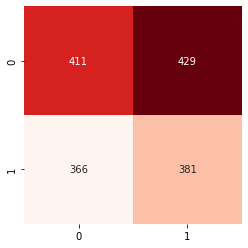

In [7]:
model_wrapper.evaluate_model(model_wrapper.model)

In [8]:
model_wrapper.export_to_png()

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.
